## Hotel Review Sentiment Analysis

The following is a brief sentiment analysis using Afinn dictionary 

The dataset for this assignment is from Kaggle.com it is reviews of hotels from the source TripAdvisor. Columns are the persons review and a rating scale from 1-5 with 5 being the best and 1 being the worst (https://www.kaggle.com/andrewmvd/trip-advisor-hotel-reviews)

### Read in or create a data frame 

In [1]:
# set up the environment
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
pd.set_option('display.max_colwidth', 15000) #important for getting all the text

In [2]:
df = pd.read_csv("C:/Users/17857/OneDrive/Desktop/Text Mining 6304/tripadvisor_hotel_reviews.csv") 

print(df.shape)
print(list(df))

(20491, 2)
['Review', 'Rating']


#### Perform the preprocessing steps you deem appropriate and append the results to your original data frame. 

In [3]:
# quick peak at basic feature space
prelim = CountVectorizer(binary=False, stop_words = 'english') 
prelim_dm = prelim.fit_transform(df['Review'])
print(prelim_dm.shape)

names = prelim.get_feature_names()
print(type(names), len(names))

count = np.sum(prelim_dm.toarray(), axis = 0).tolist()
print(type(count), len(count))
count_df = pd.DataFrame(count, index = names, columns = ['count'])

print(count_df.sort_values(['count'], ascending = False).head(40))

(20491, 52650)
<class 'list'> 52650
<class 'list'> 52650
             count
hotel        49814
room         35331
great        21475
good         17412
staff        16633
stay         15411
did          14006
just         12667
nice         12643
rooms        12401
location     11351
stayed       10500
service      10367
night        10151
time         10120
beach        10061
day           9967
breakfast     9737
clean         9597
food          9412
like          8254
resort        8139
place         7791
really        7790
pool          7577
friendly      6893
people        6836
small         6595
little        6260
walk          6255
got           6206
excellent     6193
area          6116
best          5750
helpful       5705
bar           5573
restaurant    5334
restaurants   5142
bathroom      5103
water         5036


In [4]:
# a little preprocessing
# custom dictionary to combine like terms
import re
reviews_dict = {'rooms':'room','restaurants':'restaurant', 'beds':'bed', 'bars':'bar','lots':'lot', 'little':'small'}


def multiple_replace(dict, Review): 

  """ Replace in 'text' all occurences of any key in the given
  dictionary by its corresponding value.  Returns the new string.""" 
  Review = str(Review).lower()

  # Create a regular expression  from the dictionary keys
  regex = re.compile("(%s)" % "|".join(map(re.escape, dict.keys())))

  # For each match, look-up corresponding value in dictionary
  return regex.sub(lambda mo: dict[mo.string[mo.start():mo.end()]], Review)

df['cleanreview'] = df.Review.apply(lambda x: multiple_replace(reviews_dict, x))

In [5]:
# create a stopwords list 
from nltk.corpus import stopwords

nltk_stopwords = stopwords.words("english")
my_stopwords = nltk_stopwords + ["10", "15", "20", '30', 'ca','got',]

print(type(nltk_stopwords))
print(len(nltk_stopwords))
print(len(my_stopwords))

<class 'list'>
179
185


In [6]:
print(list(df))

['Review', 'Rating', 'cleanreview']


In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# instantiate vectorizer(s)
cv1 = CountVectorizer(lowercase=True, 
                     stop_words=my_stopwords,
                     binary=False,
                     max_df=0.99, 
                     min_df=0.01,
                     ngram_range = (1,2)) 
tfidf1 = TfidfVectorizer(lowercase=True, 
                        stop_words= my_stopwords, 
                        max_df=0.99, 
                        min_df=0.01,
                        ngram_range = (1,2)) 



# fit and transform text
cv_dm = cv1.fit_transform(df['cleanreview'])
tfidf_dm = tfidf1.fit_transform(df['cleanreview'])


# print matrix shape(s)
print(cv_dm.shape)
print(tfidf_dm.shape)
names = cv1.get_feature_names()
print(type(names), len(names))

(20491, 1683)
(20491, 1683)
<class 'list'> 1683


In [8]:
count = np.sum(cv_dm.toarray(), axis = 0).tolist()
print(type(count), len(count))
count_df = pd.DataFrame(count, index = names, columns = ['count'])

count_df.sort_values(['count'], ascending = False).head(40)

<class 'list'> 1683


,count
hotel,49814
room,47732
great,21475
good,17412
staff,16633
stay,15411
small,12855
nice,12643
location,11351
stayed,10500


## Create a sentiment dictionary from Using Afinn dictionary

In [9]:
# here we are going for strictly the sum:  add up the positives and "subtract" the negatives
# you can return a number or a label
#some dictionaries assign a value 
afinn = {}
for line in open("C:/Users/17857/Downloads/AFINN-111.txt"):
    tt = line.split('\t')
    afinn.update({tt[0]:int(tt[1])})

In [10]:
def afinn_sent(inputstring):
    
    sentcount =0
    for word in inputstring.split():  
        if word.rstrip('?:!.,;') in afinn:
            sentcount = sentcount + afinn[word.rstrip('?:!.,;')]
            
    
    if (sentcount < 0):
        sentiment = 'Negative'
    elif (sentcount > 0):
        sentiment = 'Positive'
    else:
        sentiment = 'Neutral'
    
    return sentiment
    #return sentcount

In [11]:
df['afinn'] = df.cleanreview.apply(lambda x: afinn_sent(x))
df.iloc[0:][['cleanreview','afinn']]

cleanreview  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [12]:
res1 = sum(1 for i in df.afinn if i == "Positive")
res2 = sum(1 for i in df.afinn if i == "Neutral")
res3 = sum(1 for i in df.afinn if i == "Negative")

d = {'Negative': res3, 'Neutral': res2, 'Positive': res1}
df2 = pd.DataFrame.from_dict(d,orient="index",columns=['Sentiment Count'])
df2

,Sentiment Count
Negative,1379
Neutral,225
Positive,18887


,Total,%
Positive,18887,92.2%
Negative,1379,6.7%
Neutral,225,1.1%


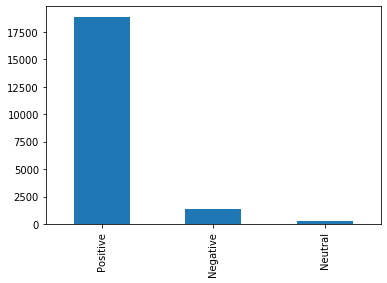

In [13]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# get a feel for the distribution
df['afinn'].value_counts().plot(kind='bar')
df.afinn.value_counts()
r = df.afinn
total = r.value_counts()
percent = r.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Total': total, '%': percent})

In [14]:
def afinn_sent(inputstring):
    
    sentcount =0
    for word in inputstring.split():  
        if word.rstrip('?:!.,;') in afinn:
            sentcount = sentcount + afinn[word.rstrip('?:!.,;')]
            
    
    if (sentcount <= -5):
        sentiment = 'Very Negative'
    elif ( -4 <= sentcount <= -2):
        sentiment = 'Negative'
    elif (sentcount == -1):
        sentiment = 'Slightly Negative'
    elif (sentcount == 0):
        sentiment = 'Neutral'
    elif (sentcount == 1):
        sentiment = 'Slightly Positive'
    elif ( 2 <= sentcount <= 4):
        sentiment = 'Positive'
    else:
        sentiment = 'Very Positive'
    
    return sentiment

In [15]:
df['afinn'] = df.cleanreview.apply(lambda x: afinn_sent(x))
df.iloc[0:][['cleanreview','afinn']]

cleanreview  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [16]:
res1 = sum(1 for i in df.afinn if i == "Very Positive")
res2 = sum(1 for i in df.afinn if i == "Positive")
res3 = sum(1 for i in df.afinn if i == "Slightly Positive")
res4 = sum(1 for i in df.afinn if i == "Neutral")
res5 = sum(1 for i in df.afinn if i == "Slightly Negative")
res6 = sum(1 for i in df.afinn if i == "Negative")
res7 = sum(1 for i in df.afinn if i == "Very Negative")

d = {'Very Negative': res7,'Negative': res6, 'Slightly Negative': res5, 'Neutral': res4, 'Slightly Positive': res3,
    'Positive': res2,'Very Positive': res1}
df3 = pd.DataFrame.from_dict(d,orient="index",columns=['Sentiment Count'])
df3

,Sentiment Count
Very Negative,751
Negative,435
Slightly Negative,193
Neutral,225
Slightly Positive,219
Positive,869
Very Positive,17799


,Total,%
Very Positive,17799,86.9%
Positive,869,4.2%
Very Negative,751,3.7%
Negative,435,2.1%
Neutral,225,1.1%
Slightly Positive,219,1.1%
Slightly Negative,193,0.9%


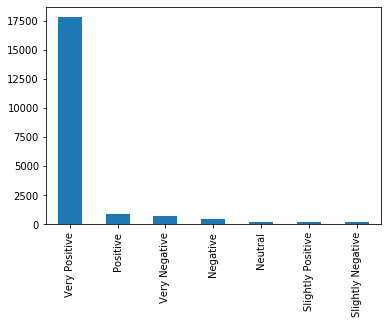

In [17]:
# Target variable is the ratings
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# get a feel for the distribution
df['afinn'].value_counts().plot(kind='bar')
df.afinn.value_counts()
r = df.afinn
total = r.value_counts()
percent = r.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Total': total, '%': percent})

In [18]:
#print(cv1.get_feature_names()) 

Decided remove the two most commonly used words 'hotel' and 'room' because they may not have much use in predicting the rating of the review. Then went back and ran models again with these features included. It did not make a difference in the accuracy at all. I began with Max df at .95 and min df at .05. When I changed these to .90 and .10 the accuracy was worsened. I then adjusted to .80 and .20 and this was even worse. I then increased the Max Df to .99 and Min df to .01 and the accuracy here improved across the board.


,Total,%
5,9054,44.2%
4,6039,29.5%
3,2184,10.7%
2,1793,8.8%
1,1421,6.9%


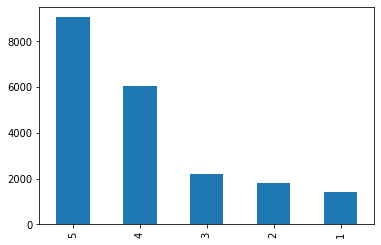

In [19]:
# Target variable is the ratings
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# get a feel for the distribution
df['Rating'].value_counts().plot(kind='bar')
df.Rating.value_counts()
r = df.Rating
total = r.value_counts()
percent = r.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Total': total, '%': percent})

#### Apply best machine learning method to make a prediction.

### Create the training and test datasets using weights

In [20]:
# train test split
# data are X, labels are y
from sklearn.model_selection import train_test_split

X = tfidf_dm.toarray()  #remember this is the output from the vectorizer
print(type(X), X[0:10])


y = df['Rating'].values #this is an array of labels
print(type(y), y[0:10])

<class 'numpy.ndarray'> [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.06140346 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
<class 'numpy.ndarray'> [4 2 3 5 5 5 5 4 5 5]


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #random_state is set seed
#70% and 30% split
# function creates 4 output structures - order matters
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(14343, 1683)
(6148, 1683)
(14343,)
(6148,)


## Logistic Regression

In [22]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# fit a logistic regression model to the data
model = LogisticRegression(random_state = 42, solver = 'lbfgs', multi_class = 'auto')
#print(model)
model.fit(X_train, y_train)

# make predictions
clf3_expected = y_test
clf3_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(clf3_expected, clf3_predicted)))
print(metrics.classification_report(clf3_expected, clf3_predicted))

0.6136955107351985
accuracy: 0.6136955107351985
              precision    recall  f1-score   support

           1       0.75      0.62      0.68       432
           2       0.47      0.40      0.43       523
           3       0.43      0.27      0.33       645
           4       0.52      0.49      0.50      1887
           5       0.69      0.83      0.75      2661

    accuracy                           0.61      6148
   macro avg       0.57      0.52      0.54      6148
weighted avg       0.60      0.61      0.60      6148



C:\Users\17857\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Best accuracy seen so far 61.5% with highest 5 rating and 1 rating precision